<a href="https://colab.research.google.com/github/janzaw04/myTestRep/blob/main/%C4%87wiczenia2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%matplotlib inline

In [3]:
#import packages and load datasets

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.model_selection import train_test_split


# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.


# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, train_size=0.5)

print("Image shape: ",X_train.shape)
# dimension of face image


Image shape:  (35000, 784)


In [5]:
# tu musimy zdefiniować klasyfikator, wytrenowaći sprawdzić "score" dla 
# danych testowych
#Proponowane parametry sieci: ukryte warstwy [100,100],solver adam, verbose=10 

clf = MLPClassifier(hidden_layer_sizes=(100,100), activation='relu', learning_rate_init=0.001, early_stopping=True, alpha=0.1, solver='adam', verbose=10, validation_fraction=0.2, max_iter=1000)
                 

print(clf.fit(X_train, y_train))

# get score
score = clf.score(X_test, y_test)
print("Score = ",score)

# get prediction
Z = clf.predict_proba(X_test)[:,1] # returns probability 
print(Z)



Iteration 1, loss = 0.65651185
Validation score: 0.916000
Iteration 2, loss = 0.29093239
Validation score: 0.938429
Iteration 3, loss = 0.23730383
Validation score: 0.946000
Iteration 4, loss = 0.20227765
Validation score: 0.956429
Iteration 5, loss = 0.18029532
Validation score: 0.956714
Iteration 6, loss = 0.16320444
Validation score: 0.961714
Iteration 7, loss = 0.14989211
Validation score: 0.964143
Iteration 8, loss = 0.13824663
Validation score: 0.964571
Iteration 9, loss = 0.13029489
Validation score: 0.966143
Iteration 10, loss = 0.12170689
Validation score: 0.969143
Iteration 11, loss = 0.11724014
Validation score: 0.967571
Iteration 12, loss = 0.11214520
Validation score: 0.968143
Iteration 13, loss = 0.10732814
Validation score: 0.965857
Iteration 14, loss = 0.10531942
Validation score: 0.970429
Iteration 15, loss = 0.10122723
Validation score: 0.972429
Iteration 16, loss = 0.09813725
Validation score: 0.970571
Iteration 17, loss = 0.09706873
Validation score: 0.969429
Iterat

[0.916, 0.9384285714285714, 0.946, 0.9564285714285714, 0.9567142857142857, 0.9617142857142857, 0.9641428571428572, 0.9645714285714285, 0.9661428571428572, 0.9691428571428572, 0.9675714285714285, 0.9681428571428572, 0.9658571428571429, 0.9704285714285714, 0.9724285714285714, 0.9705714285714285, 0.9694285714285714, 0.9725714285714285, 0.9715714285714285, 0.9727142857142858, 0.9721428571428572, 0.971, 0.9692857142857143, 0.972, 0.9724285714285714, 0.9712857142857143, 0.9697142857142858, 0.9731428571428572, 0.973, 0.9714285714285714, 0.9698571428571429, 0.968, 0.9704285714285714, 0.973, 0.9704285714285714, 0.9722857142857143, 0.9691428571428572, 0.9724285714285714, 0.9718571428571429]


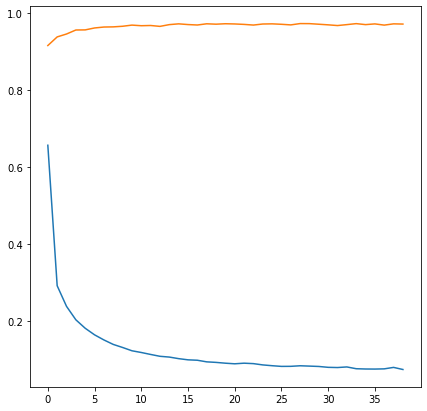

In [6]:
# tu rysujemy loss i validation score
fig=plt.figure(figsize=(7,7))

plt.plot(clf.loss_curve_)
#Warning: thiscan be usedonly if early_stopping=True
print(clf.validation_scores_)
plt.plot(np.asarray(clf.validation_scores_))

plt.show()

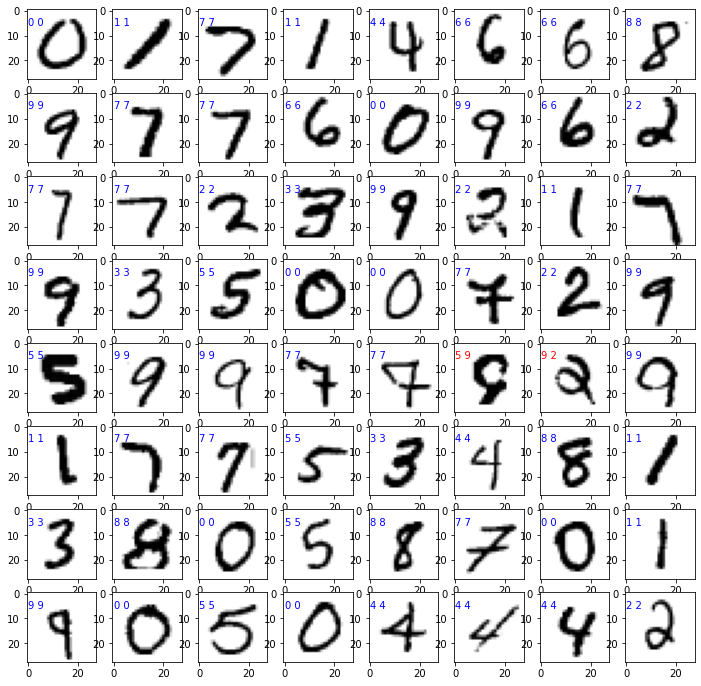

In [7]:
# Plot the prediction
fig = plt.figure(figsize=(12, 12)) #figure size in inches
predicted = clf.predict(X_test)

# Tu rysujemy cyfry z wynikami
#plot the digits: each image is 28x28 pixels
for i in range(64):
  ax = fig.add_subplot(8, 8, i + 1)
  ax.imshow(X_test[i].reshape(28,28),cmap=plt.cm.binary)
  if y_test[i] == predicted[i]:
    ax.text(0,6,predicted[i] + ' ' + y_test[i], color='blue')
  else:
    ax.text(0,6,predicted[i] + ' ' + y_test[i], color='red')



In [8]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3409
           1       0.99      0.98      0.98      3949
           2       0.98      0.95      0.97      3500
           3       0.97      0.96      0.97      3557
           4       0.97      0.98      0.97      3398
           5       0.96      0.97      0.97      3203
           6       0.96      0.99      0.97      3444
           7       0.97      0.98      0.97      3637
           8       0.96      0.97      0.96      3437
           9       0.96      0.96      0.96      3466

    accuracy                           0.97     35000
   macro avg       0.97      0.97      0.97     35000
weighted avg       0.97      0.97      0.97     35000



In [9]:
print(metrics.confusion_matrix(y_test, predicted))

[[3339    0    2    2    1    9   34    3   12    7]
 [   1 3875   19    9    7    3    5    9   16    5]
 [  15   11 3321   18   14    3   29   49   36    4]
 [   2    3   12 3413    1   53    3   20   35   15]
 [   4    4    7    0 3328    1   20    4    7   23]
 [   9    5    3   17    4 3113   20    2   15   15]
 [   7    4    0    0   14   14 3394    0   11    0]
 [   2    8   12    6   13    7    2 3550    2   35]
 [   8   12    4   20   10   15   25    5 3321   17]
 [   7    6    1   17   39   19    4   24   17 3332]]


In [10]:

####################################################
# Load dataset with faces
from sklearn.datasets import fetch_lfw_people

# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=100, resize=0.50)  
print(lfw_people.images.shape)


# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
# to get real names, not digits
target_names = lfw_people.target_names

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

print("Image shape: ",X_train.shape)
# dimension of face image
nfaces, h, w = lfw_people.images.shape
print("Image shape: ", h, w)

(1140, 62, 47)
Image shape:  (855, 2914)
Image shape:  62 47


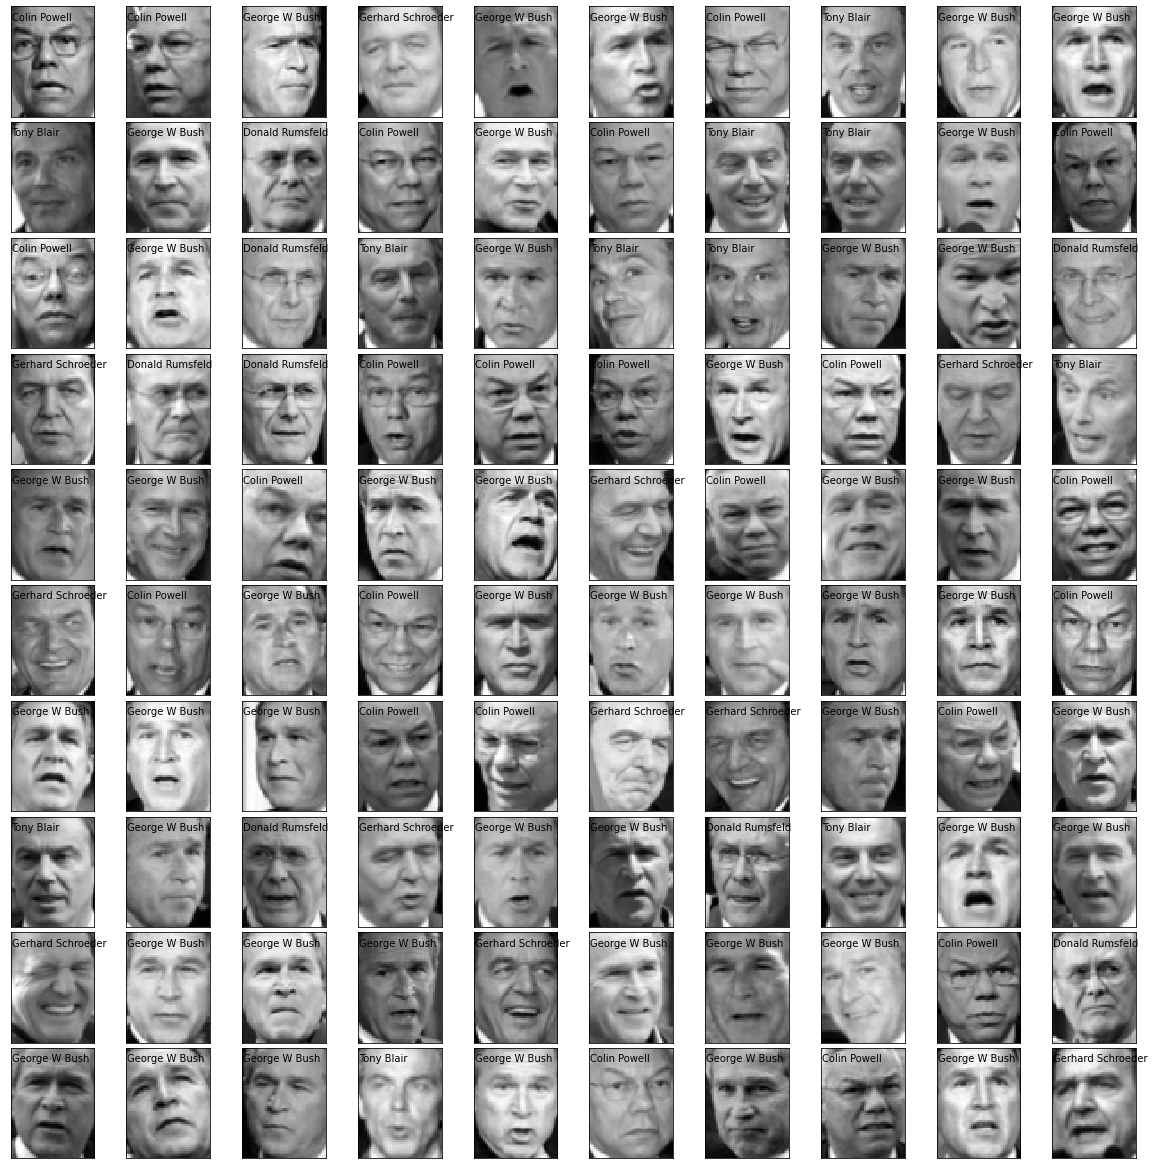

In [11]:
# tu rysujemy twarze
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16, 16)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(100):
  ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(h,w), cmap=plt.cm.gray, interpolation='nearest')
  # label the image with the target value
  ax.text(0, 7, str(target_names[y_test[i]]))

In [12]:
# train the model
clf = MLPClassifier(hidden_layer_sizes=(100,100), activation='relu', alpha=1, learning_rate_init=0.001, early_stopping=True, 
                    solver='adam', verbose=10, validation_fraction=0.2, max_iter=1000, n_iter_no_change=90)
                 

print(clf.fit(X_train, y_train))

# get score
score = clf.score(X_test, y_test)
print("Score = ",score)

# get prediction
Z = clf.predict_proba(X_test)[:,1] # returns probability 
print(Z)



Iteration 1, loss = inf
Validation score: 0.467836
Iteration 2, loss = inf
Validation score: 0.233918
Iteration 3, loss = inf
Validation score: 0.280702
Iteration 4, loss = 82.43165988
Validation score: 0.128655
Iteration 5, loss = 53.33033736
Validation score: 0.116959
Iteration 6, loss = 33.36191310
Validation score: 0.467836
Iteration 7, loss = 38.85886466
Validation score: 0.076023
Iteration 8, loss = 34.03697618
Validation score: 0.450292
Iteration 9, loss = 50.61497711
Validation score: 0.485380
Iteration 10, loss = 29.07634512
Validation score: 0.081871
Iteration 11, loss = 39.51694358
Validation score: 0.169591
Iteration 12, loss = 32.85262567
Validation score: 0.175439
Iteration 13, loss = 25.98235161
Validation score: 0.497076
Iteration 14, loss = 19.47040056
Validation score: 0.461988
Iteration 15, loss = 25.87917404
Validation score: 0.286550
Iteration 16, loss = 16.71259319
Validation score: 0.473684
Iteration 17, loss = 11.08571020
Validation score: 0.286550
Iteration 18,

[0.4678362573099415, 0.23391812865497075, 0.2807017543859649, 0.1286549707602339, 0.11695906432748537, 0.4678362573099415, 0.07602339181286549, 0.4502923976608187, 0.4853801169590643, 0.08187134502923976, 0.1695906432748538, 0.17543859649122806, 0.49707602339181284, 0.4619883040935672, 0.28654970760233917, 0.47368421052631576, 0.28654970760233917, 0.4502923976608187, 0.5730994152046783, 0.5672514619883041, 0.5730994152046783, 0.5614035087719298, 0.5555555555555556, 0.5847953216374269, 0.6081871345029239, 0.5380116959064327, 0.631578947368421, 0.5087719298245614, 0.5730994152046783, 0.631578947368421, 0.6491228070175439, 0.6432748538011696, 0.631578947368421, 0.6549707602339181, 0.672514619883041, 0.695906432748538, 0.6900584795321637, 0.5789473684210527, 0.5497076023391813, 0.7076023391812866, 0.7017543859649122, 0.7076023391812866, 0.7309941520467836, 0.6842105263157895, 0.672514619883041, 0.6432748538011696, 0.6374269005847953, 0.6783625730994152, 0.6198830409356725, 0.66666666666666

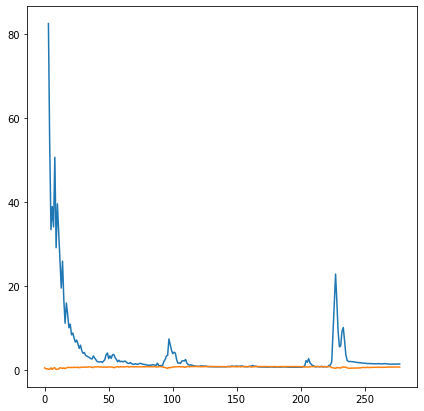

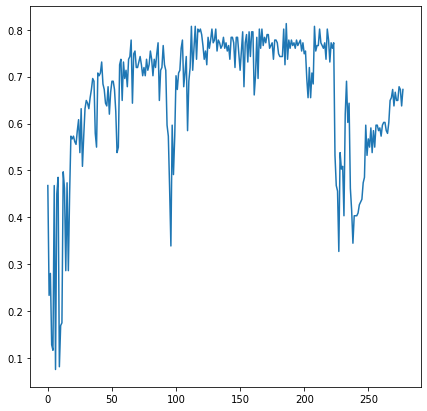

In [13]:
fig=plt.figure(figsize=(7,7))

plt.plot(clf.loss_curve_)
#Warning: thiscan be usedonly if early_stopping=True
print(clf.validation_scores_)
plt.plot(np.asarray(clf.validation_scores_))

plt.show()

fig=plt.figure(figsize=(7,7))

#plt.plot(clf.loss_curve_)
#Warning: thiscan be usedonly if early_stopping=True
plt.plot(np.asarray(clf.validation_scores_))

plt.show()

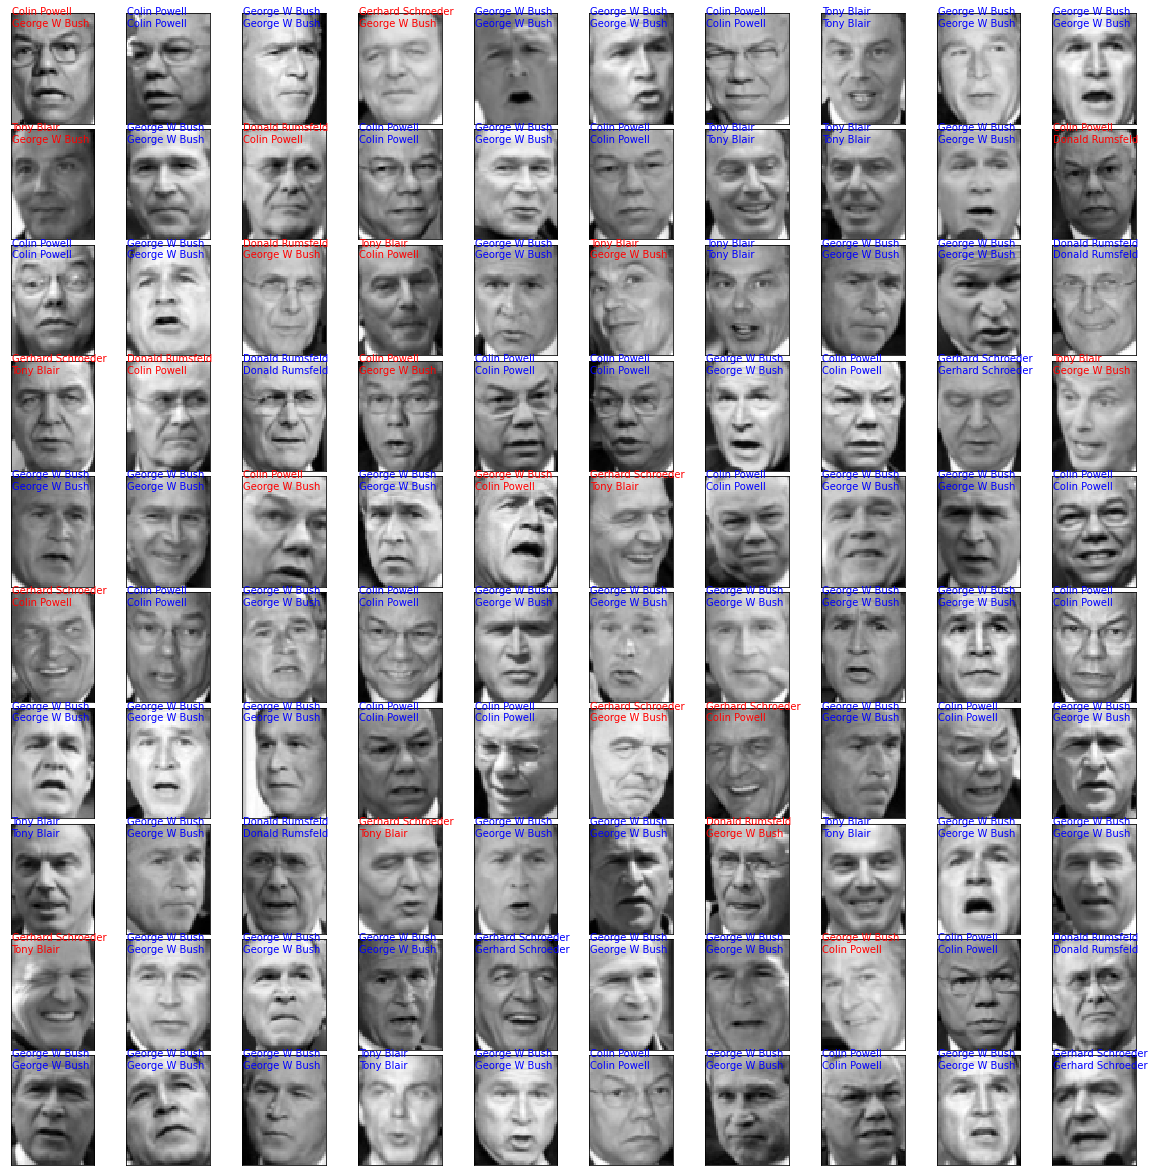

In [15]:
# Plot the prediction
predicted = clf.predict(X_test)

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16, 16)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(100):
  ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(h,w), cmap=plt.cm.gray, interpolation='nearest')
  # label the image with the target value
  if y_test[i] == predicted[i]:
    ax.text(0, 7, str(target_names[y_test[i]]) +" \n"+str(target_names[predicted[i]]), color='blue')
  else:
    ax.text(0, 7, str(target_names[y_test[i]]) +" \n"+str(target_names[predicted[i]]), color='red')
    

In [16]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        64
           1       0.94      0.53      0.68        32
           2       0.81      0.93      0.86       127
           3       0.88      0.48      0.62        29
           4       0.69      0.73      0.71        33

    accuracy                           0.80       285
   macro avg       0.82      0.71      0.74       285
weighted avg       0.81      0.80      0.79       285



In [17]:
print(metrics.confusion_matrix(y_test, predicted))

[[ 55   1   6   0   2]
 [  2  17  12   0   1]
 [  6   0 118   2   1]
 [  5   0   3  14   7]
 [  2   0   7   0  24]]
